>[Домашнє завдання 4](#scrollTo=T4b6KER-CHXI)

>>>[Опис завдання](#scrollTo=zDFA10t-CqWd)

>>>[Розв'язок](#scrollTo=HtPuUyL-B7cw)



In [1]:
!pip install kneed

In [ ]:
# !pip install pickle-mixin

In [ ]:
# !pip install pycaret[full]

In [2]:
import pickle

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline
import matplotlib.pyplot as plt

import math
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from kneed import KneeLocator

#Домашнє завдання 4

###Опис завдання


Завдання реалізуються у Google Colab у блоках коду, а коментарі та висновки додаються у Markdown блоках. Потрібно виконати наступні дії.
Особливість даного завдання полягає в тому, що використовується набір даних Iris, який має розмічені спостереження. Але стовпець з номерами класів буде викоритовуватись тільки на останніх кроках для визначення якості кластеризації.
Сам метод кластеризації буде використовувати тільки чотири ознаки, без врахування стовпця з розміткою.

 1. Завантажити набір даних Iris та виконати описовий аналіз даних, як це було у попередніх роботах

 2. Виконати описовий аналіз даних за алгоритмом з попереднього домашнього завдання.

 3. Виконайте стандартизацію даних за допомогою функції StandardScaler().

 4. Виконати зниження розмірності за допомогою PCA для візуалізації даних на точковій діаграмі.

 5. Виконайти кластеризацію за допомогою функції KMeans для декількох значень кількості кластерів. Використовуйте для кластеризації оригінальні стандартизовані ознаки.

 6. Визначте оптимальну кількість кластерів за допомогою метода ліктя. Використайте функцію KneeLocator з бібліотеки kneed.

 7. Спробуйте описати, які дані потрапляють у окремі кластери.

 8. Порівняйте отримані мітки кластерів з мітками класів з набору даних.

 9. Використайте Confusion Matrix для оцінки точності кластеризації на наборі даних Iris.

 10. Візуалізуйте отриманий розподіл на точковій діаграмі.

 11. Зробіть висновок про ефективність роботи методу кластеризації та методу PCA зменшення розмірності ознак.



**Пiдказки**

Для виконання завдання використовуй функції бібліотек pandas, seaborn.


**Критерії виконаного завдання**

- Створено Google Colab, в якому виконанi усі зазначені етапи.
- До Google Colab додані висновки.

###Розв'язок

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import SpectralClustering
from sklearn import metrics


In [5]:
iris = datasets.load_iris()
data = iris.data
targets = iris.target

In [6]:
data.shape

(150, 4)

In [7]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
df = pd.DataFrame(data, columns=iris.feature_names)
df['target_names'] = targets
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_names
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [10]:
df.target_names.value_counts()

,count
target_names,
0,50
1,50
2,50


In [11]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_names
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [12]:
features = df.iloc[:, :-1]
features.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
scaler = StandardScaler()
scaled = scaler.fit_transform(features)

In [14]:
df_scaled = pd.DataFrame(scaled, columns=features.columns)
df_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


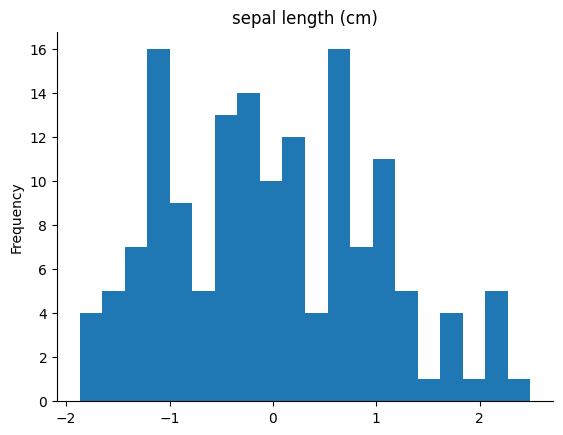

In [16]:
# @title sepal length (cm)

from matplotlib import pyplot as plt
df_scaled['sepal length (cm)'].plot(kind='hist', bins=20, title='sepal length (cm)')
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has be

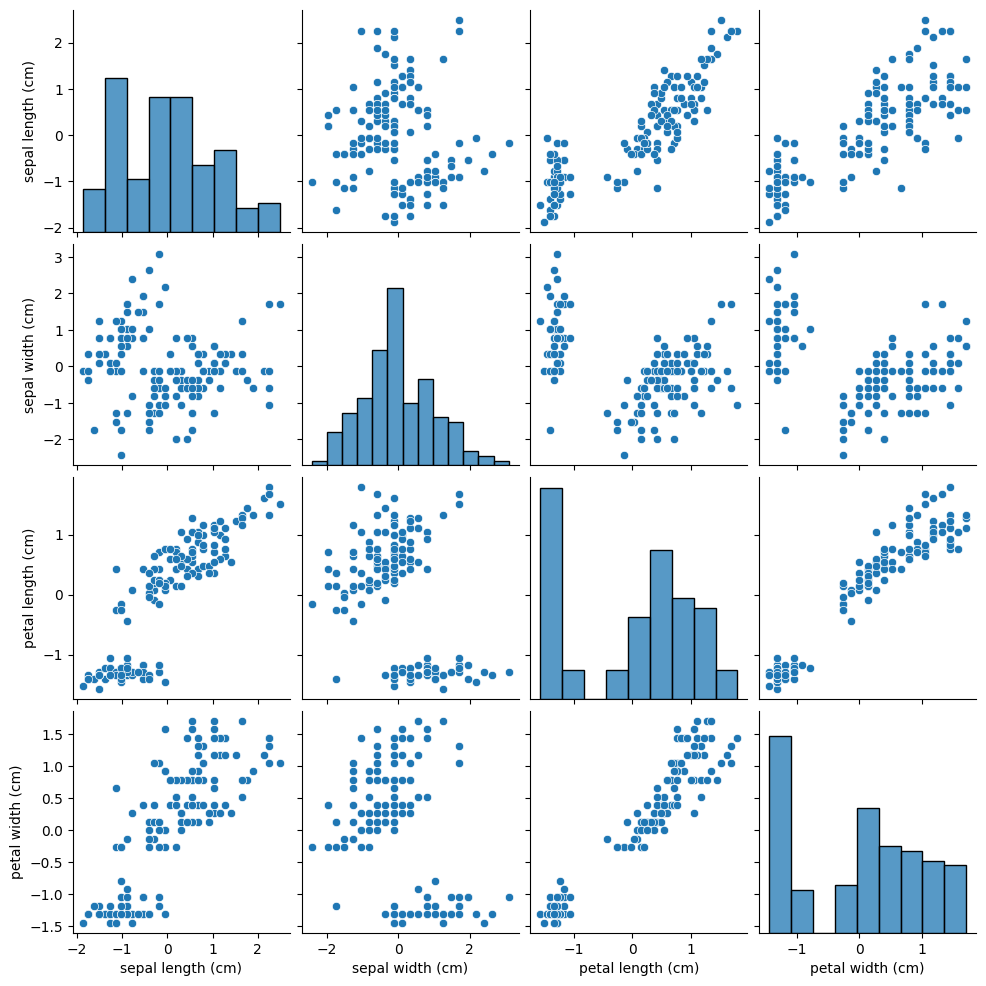

In [20]:
sns.pairplot(df_scaled, palette= "plasma", diag_kind='hist')

Зниження розмірності за допомогою PCA для візуалізації даних

<Axes: xlabel='pca1', ylabel='pca2'>

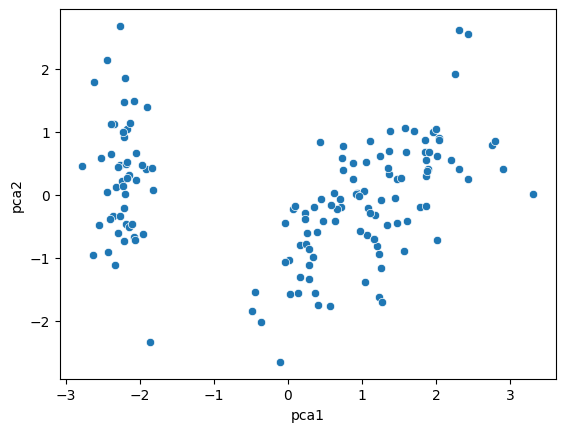

In [17]:
pca = PCA(2)
pca.fit(df_scaled)
X_PCA = pca.transform(df_scaled)
X_PCA.shape

df_pca = pd.DataFrame(X_PCA, columns = ['pca1', 'pca2'])

sns.scatterplot(data=df_pca, x="pca1", y="pca2")

Кластеризація

In [21]:
n_clusters = 10
cost = []
silh = []
for i in range(1,n_clusters):
    kmean = KMeans(i)
    kmean.fit(df_scaled)
    cost.append(kmean.inertia_)


3


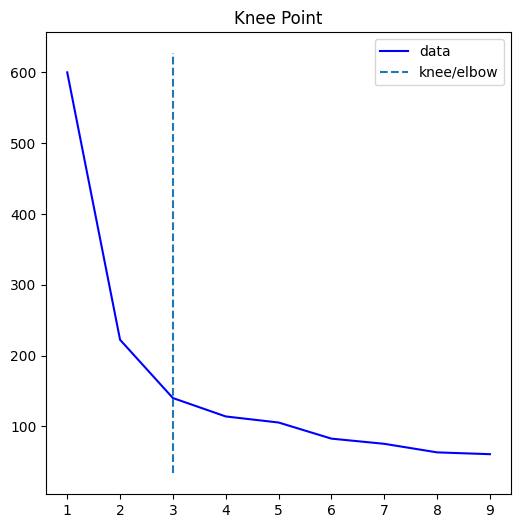

In [24]:
kneedle = KneeLocator(
  x=range(1, len(cost)+1),
  y=cost,
  curve="convex",
  direction="decreasing")
print(kneedle.elbow)
kneedle.plot_knee()

In [25]:
kmean = KMeans(3)
kmean.fit(df_scaled)
preds = kmean.labels_

In [26]:
df_scaled['Ground Truth'] = targets
df_scaled['Predictions'] = preds
df_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Ground Truth,Predictions
0,-0.900681,1.019004,-1.340227,-1.315444,0,1
1,-1.143017,-0.131979,-1.340227,-1.315444,0,1
2,-1.385353,0.328414,-1.397064,-1.315444,0,1
3,-1.506521,0.098217,-1.283389,-1.315444,0,1
4,-1.021849,1.249201,-1.340227,-1.315444,0,1


In [27]:
print(df_scaled['Ground Truth'].unique())
print(df_scaled['Predictions'].unique())

[0 1 2]
[1 2 0]


Порівняння спрогнозованих кластерів та дійсних класів за допомогою Confusion Matrix


In [28]:
cm = metrics.confusion_matrix(targets, preds)
cm

array([[ 0, 50,  0],
       [39,  0, 11],
       [14,  0, 36]])

(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, '0'), Text(0, 1.5, '1'), Text(0, 2.5, '2')])

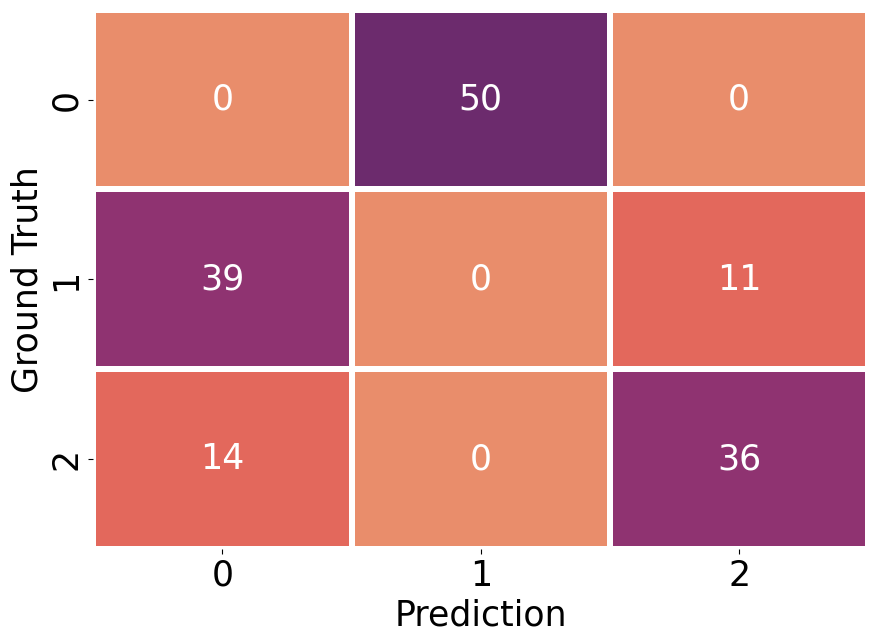

In [29]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', linewidth=3, annot_kws={'size':25},
            cbar=False, cmap=sns.color_palette('flare'))
plt.ylabel('Ground Truth', fontsize=25)
plt.xlabel('Prediction', fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

Візуалізація результатів кластеризації

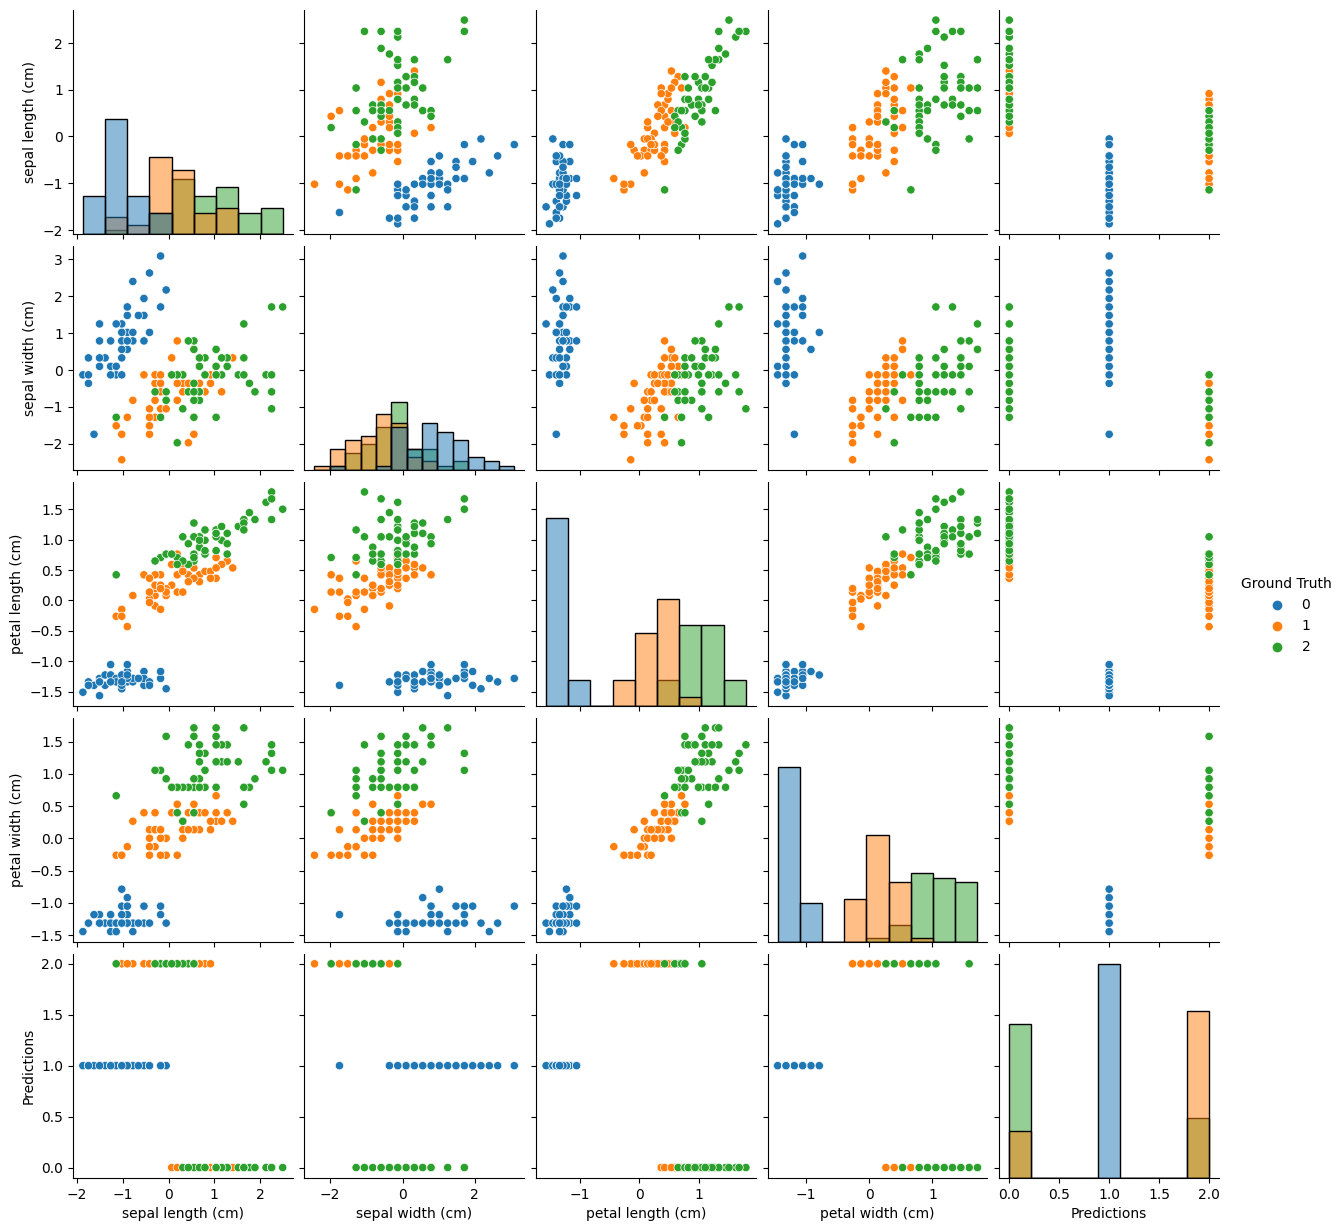

In [ ]:
sns.pairplot(df_scaled, hue='Ground Truth', palette= "tab10", diag_kind='hist')

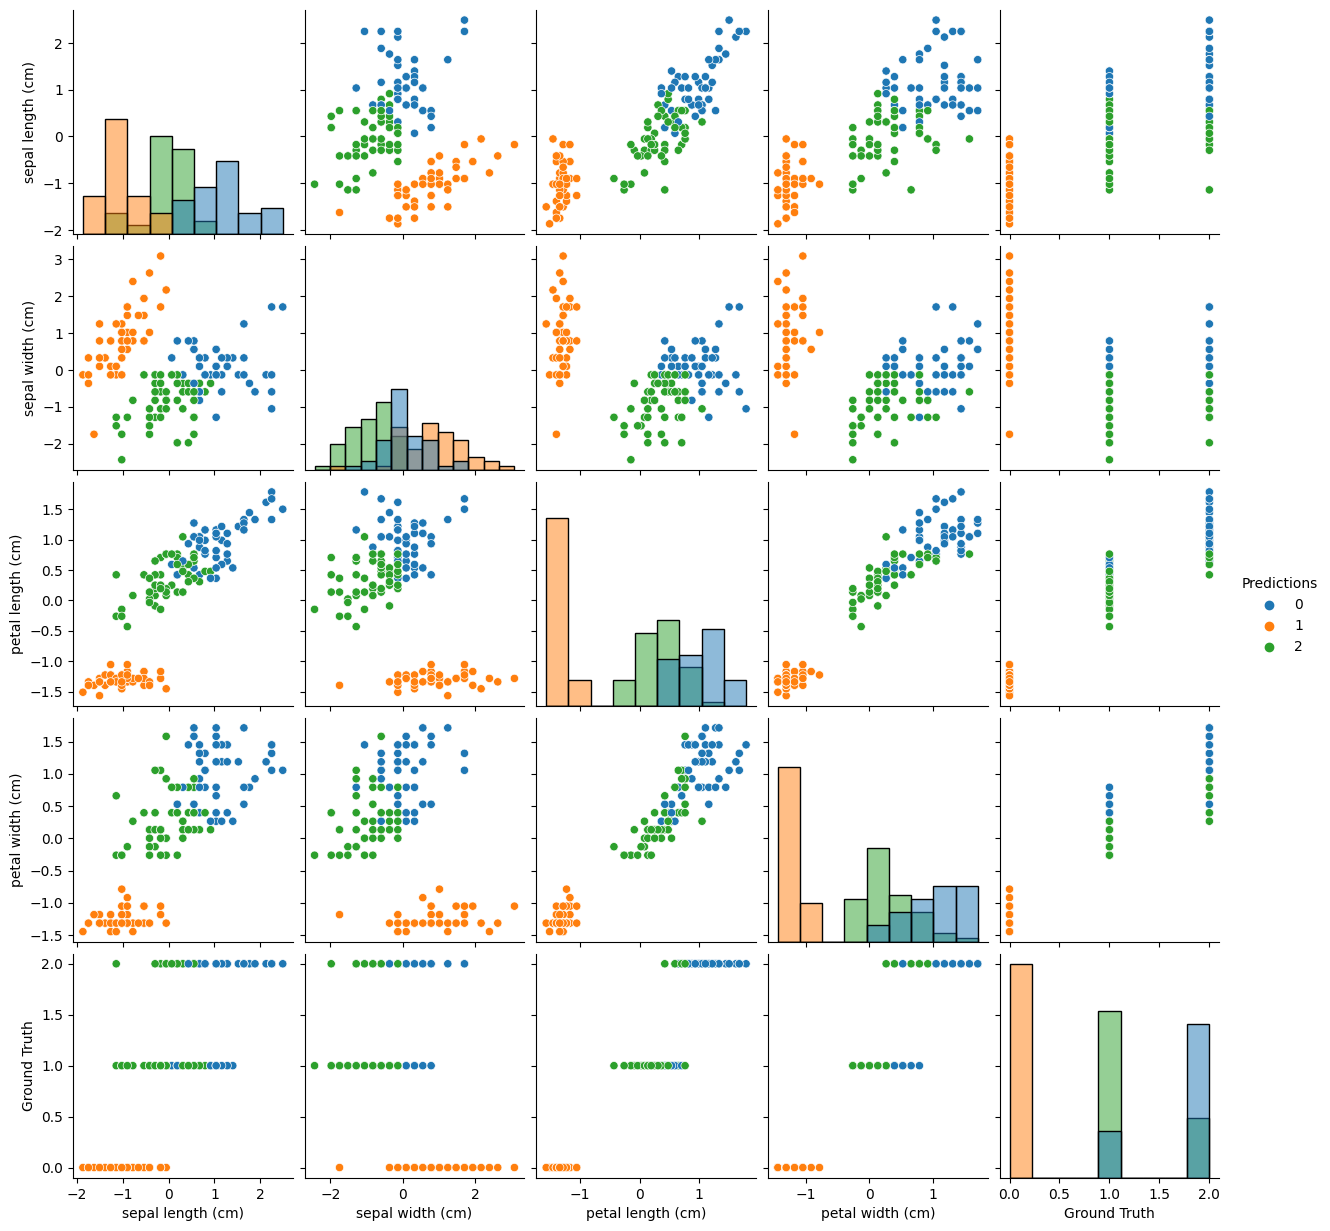

In [ ]:
sns.pairplot(df_scaled, hue='Predictions', palette= "tab10", diag_kind='hist')

**Висновок**.  Модель взагалі не передбачає клас 0 і 1 правильно!
✔ Модель добре передбачає клас 2 (36 правильних передбачень).
✔ Є багато помилок між класами 0 і 1 (наприклад, 50 разів клас 0 визначили як 1).